In [2]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import cv2
import os
import torch

In [3]:
def realWorldProject(uv, Tf, K, depthf):
    K_inv = np.array(
        [
            [1 / K[0, 0], 0.0, -K[0, 2] / K[0, 0]],
            [0.0, 1 / K[1, 1], -K[1, 2] / K[1, 1]],
            [0.0, 0.0, 1.0],
        ]
    )

    tmp = np.concatenate([uv, np.ones((1, uv.shape[1]))])
    tmp = K_inv @ tmp
    if isinstance(uv, np.ndarray):
        tmp = tmp * depthf[uv[1].astype(np.int64), uv[0].astype(np.int64)].numpy()
    else:
        tmp = (
            tmp * depthf[uv[1].long(), uv[0].long()].numpy()
        )  # real world in camera coordinates
    tmp = np.concatenate([tmp, np.ones((1, tmp.shape[1]))])
    tmp = Tf @ tmp  # real world coordinates
    tmp = tmp[:3, :]  # real world coordinates

    return tmp

In [40]:
''' H: 480 #480 # 720
  W: 640 #680 920
  fx: 476.333 #480
  fy: 476.333 #480
  cx: 318 # 318
  cy: 240 #  240'''
K = np.array([[476.333, 0.0, 318], [0.0, 476.333, 240], [0.0, 0.0, 1.0]])

In [51]:
poses = np.loadtxt('/home/rozenberszki/D_Project/wsnsl/Dataset/41b00feddb/traj.txt').reshape(-1, 4, 4)
poses.shape

(7122, 4, 4)

In [52]:
directory_path = '/home/rozenberszki/D_Project/wsnsl/Dataset/41b00feddb/color_path/'

# Retrieve and sort all PNG files numerically by the number in their filename
depths = sorted(
    glob.glob(f'{directory_path}/*.png'), 
    key=lambda x: int(x.split('/')[-1].split('_')[1].split('.')[0])
)

# Display sorted file paths
depths

['/home/rozenberszki/D_Project/wsnsl/Dataset/41b00feddb/color_path/frame_000000.png',
 '/home/rozenberszki/D_Project/wsnsl/Dataset/41b00feddb/color_path/frame_000001.png',
 '/home/rozenberszki/D_Project/wsnsl/Dataset/41b00feddb/color_path/frame_000002.png',
 '/home/rozenberszki/D_Project/wsnsl/Dataset/41b00feddb/color_path/frame_000003.png',
 '/home/rozenberszki/D_Project/wsnsl/Dataset/41b00feddb/color_path/frame_000004.png',
 '/home/rozenberszki/D_Project/wsnsl/Dataset/41b00feddb/color_path/frame_000005.png',
 '/home/rozenberszki/D_Project/wsnsl/Dataset/41b00feddb/color_path/frame_000006.png',
 '/home/rozenberszki/D_Project/wsnsl/Dataset/41b00feddb/color_path/frame_000007.png',
 '/home/rozenberszki/D_Project/wsnsl/Dataset/41b00feddb/color_path/frame_000008.png',
 '/home/rozenberszki/D_Project/wsnsl/Dataset/41b00feddb/color_path/frame_000009.png',
 '/home/rozenberszki/D_Project/wsnsl/Dataset/41b00feddb/color_path/frame_000010.png',
 '/home/rozenberszki/D_Project/wsnsl/Dataset/41b00fedd

In [53]:
png_depth_scale = 1000

In [54]:
depth_data = cv2.imread(depths[0], cv2.IMREAD_UNCHANGED)
depth_data = depth_data.astype(np.float32) / png_depth_scale
depth = np.array(depth_data)


In [55]:
a = np.array([1,2,3,4])
np.where(a == 1)

(array([0]),)

In [56]:
depth.shape

(480, 640)

In [57]:
out = realWorldProject(np.array(np.where(depth > 0))[::-1], poses[0], K, torch.from_numpy(depth))

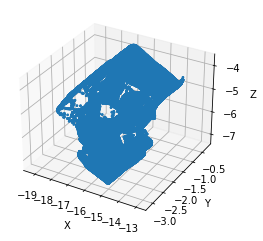

In [58]:
import matplotlib.pyplot as plt

# Assuming 'out' is the variable containing the array
x = out[0]  # x-coordinates
y = out[1]  # y-coordinates
z = out[2]  # z-coordinates

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, s=2)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


In [59]:
import matplotlib.pyplot as plt

In [60]:
import numpy as np

out_min = np.min(out, axis=1)-1
out_max = np.max(out, axis=1)+1
list(zip(out_min, out_max))


[(-20.250008496138566, -11.907409896717752),
 (-4.112293300073711, 0.7526168358402805),
 (-8.185245753536197, -2.763493021909295)]